# Question 3

In [1]:
import question3 as q3
import warnings
warnings.filterwarnings('ignore')

Do Oscar judges favor any high profile director? This is the question we will be answering to in this section.

To estimate how popular a director was at the year of the given oscar ceremony, we set a 'high profile score' as the mean of all the box office revenue the director has participated in before the oscar ceremony.

In [ ]:
df_Q3, df_actor = q3.load_data_Q3()


In [ ]:
df_actor.head(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,profile_score
0,nm0000001,Fred Astaire,1899,1987,"[actor, miscellaneous, producer]","[The Towering Inferno, Funny Face, On the Beac...",34925000.0
5,nm0000006,Ingrid Bergman,1915,1982,"[actress, producer, soundtrack]","[Casablanca, Gaslight, Spellbound, Notorious]",2903250.0
7,nm0000008,Marlon Brando,1924,2004,"[actor, director, writer]","[Apocalypse Now, The Godfather, On the Waterfr...",69525000.0
8,nm0000009,Richard Burton,1925,1984,"[actor, producer, director]","[Who's Afraid of Virginia Woolf?, 1984, The Sp...",10000000.0
10,nm0000011,Gary Cooper,1901,1961,"[actor, stunts, producer]","[High Noon, Sergeant York, Mr. Deeds Goes to T...",2000000.0


In [ ]:
df_Q3.head(5)

,tconst,primaryTitle,IMDB_genres,averageRating,numVotes,release,revenue,runtime,countries,oscar_category,oscar_year,winner,directors,writers
0,tt0101414,beauty and the beast,"Animation,Family,Fantasy",8.0,486035,1991,424967620.0,85.0,United States of America,best picture,1992,False,Gary Trousdale,"nm0941314,nm0152312,nm0761498,nm0560329,nm0363..."
3,tt0063518,romeo and juliet,"Drama,Romance",7.6,35297,1968,38901218.0,138.0,"Italy, United Kingdom",best picture,1969,False,Franco Zeffirelli,"nm0000636,nm0116663,nm0195148,nm0001874"
4,tt0106977,the fugitive,"Action,Crime,Drama",7.8,325928,1993,368875760.0,130.0,United States of America,best picture,1994,False,Andrew Davis,"nm0835732,nm0878638,nm0400403"
6,tt0783233,atonement,"Drama,Mystery,Romance",7.8,305235,2007,129266061.0,122.0,"France, United Kingdom",best picture,2008,False,Joe Wright,"nm0568605,nm0358960"
7,tt0068473,deliverance,"Adventure,Drama,Thriller",7.7,121832,1972,46122355.0,110.0,United States of America,best picture,1973,False,John Boorman,"nm0225463,nm0000958"


In [ ]:
first_year, last_year, director_revenue_year = q3.compute_profile_score(df_Q3)

scores = []

directors = df_Q3['directors'].values
years = df_Q3['release'].values

for i in range(len(directors)):
    scores.append(director_revenue_year[years[i]][directors[i]])

df_Q3['profile score'] = scores

df_Q3

,tconst,primaryTitle,IMDB_genres,averageRating,numVotes,release,revenue,runtime,countries,oscar_category,oscar_year,winner,directors,writers,profile score
0,tt0101414,beauty and the beast,"Animation,Family,Fantasy",8.0,486035,1991,424967620.0,85.0,United States of America,best picture,1992,False,Gary Trousdale,"nm0941314,nm0152312,nm0761498,nm0560329,nm0363...",424967620.0
3,tt0063518,romeo and juliet,"Drama,Romance",7.6,35297,1968,38901218.0,138.0,"Italy, United Kingdom",best picture,1969,False,Franco Zeffirelli,"nm0000636,nm0116663,nm0195148,nm0001874",38901218.0
4,tt0106977,the fugitive,"Action,Crime,Drama",7.8,325928,1993,368875760.0,130.0,United States of America,best picture,1994,False,Andrew Davis,"nm0835732,nm0878638,nm0400403",368875760.0
6,tt0783233,atonement,"Drama,Mystery,Romance",7.8,305235,2007,129266061.0,122.0,"France, United Kingdom",best picture,2008,False,Joe Wright,"nm0568605,nm0358960",129266061.0
7,tt0068473,deliverance,"Adventure,Drama,Thriller",7.7,121832,1972,46122355.0,110.0,United States of America,best picture,1973,False,John Boorman,"nm0225463,nm0000958",46122355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,tt1210166,moneyball,"Biography,Drama,Sport",7.6,475303,2011,110206216.0,133.0,United States of America,best picture,2012,False,Bennett Miller,"nm0001873,nm0815070,nm3133181,nm1034122",110206216.0
279,tt1375666,inception,"Action,Adventure,Sci-Fi",8.8,2609684,2010,825532764.0,148.0,"United States of America, United Kingdom",best picture,2011,False,Christopher Nolan,nm0634240,825532764.0
280,tt1285016,the social network,"Biography,Drama",7.8,773872,2010,224920315.0,120.0,United States of America,best picture,2011,False,David Fincher,"nm0815070,nm0583826",279426199.0
282,tt1542344,127 hours,"Biography,Drama",7.5,407505,2010,61738797.0,90.0,"United States of America, United Kingdom",best picture,2011,False,Danny Boyle,"nm0000965,nm0064479,nm1737008",219824670.5


### Actors

Let's also take a quick look at the most popular actors using the same metrics

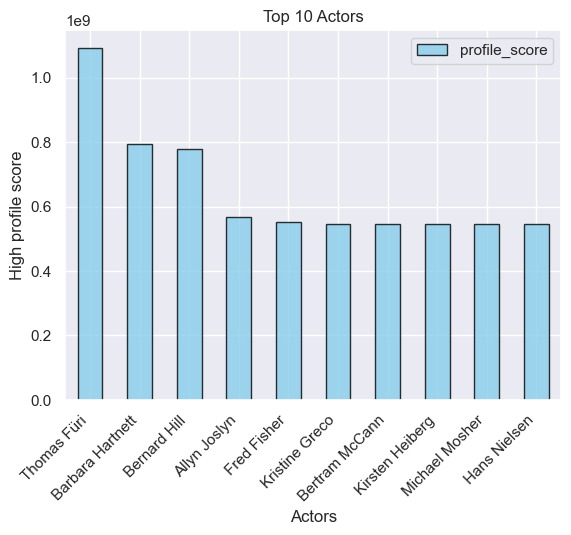

In [ ]:

q3.plot_top_actors(df_actor, 10)

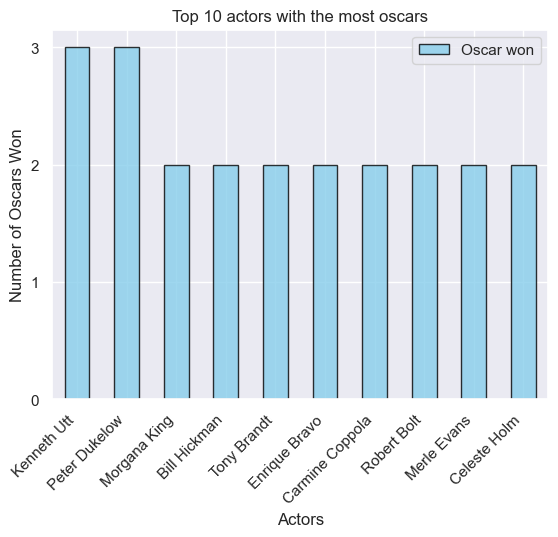

In [ ]:

q3.count_won_oscar_actor(df_actor, 10)

### Directors

In [ ]:

q3.plot_top_directors_interactive(director_revenue_year, 10)

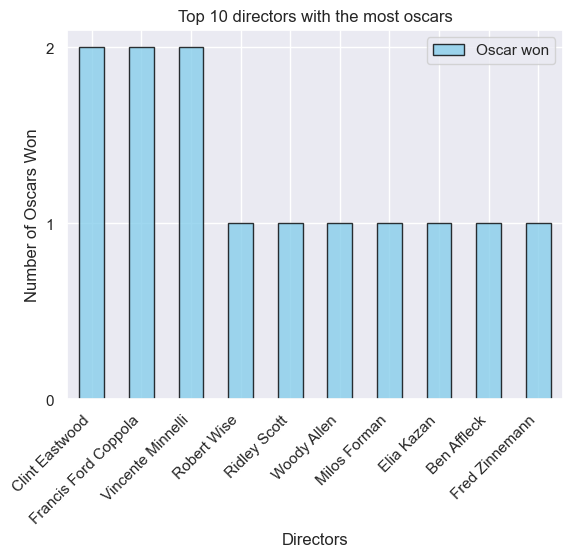

In [ ]:

q3.count_won_oscar(df_Q3, 10)

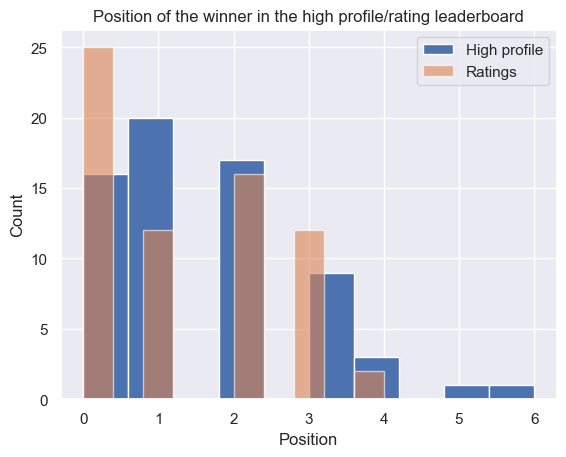

In [ ]:
winner_position_profile, winner_position_rating = q3.plot_winner_position(df_Q3)

If each year, we sort the nominees by average ratings and by 'high profile score' in descending order, we see that the distributions are quite similar and heavy-tailed: oscar winning-movies are thus well rated and directed by a popular director.

To reinforce our intuition, we can perform a statistical test to decide whether there is a significant difference between these 2 distributions at $\alpha = 5\%$:

$$
H_0: \mathcal{D}_{\text{ratings}} = \mathcal{D}_{\text{profiles}}
$$

$$
H_1: \mathcal{D}_{\text{ratings}} \ne \mathcal{D}_{\text{profiles}}
$$


In [ ]:
q3.compare_distribution(winner_position_profile, winner_position_rating)

p value = 0.28297678122945064
fail to reject the null hypothesis (no significant difference)


This is a first proof that these metrics are correlated!

To get deeper insights, let's see if we can predict wether an movie won an oscar based on the profile score of its director and the average rating the movie got. To perform this binary classification task, we will use a logistic regression.

Profile score coefficient: -3.509660819919821e-09, average rating coefficient: -2.054557822926647e-15


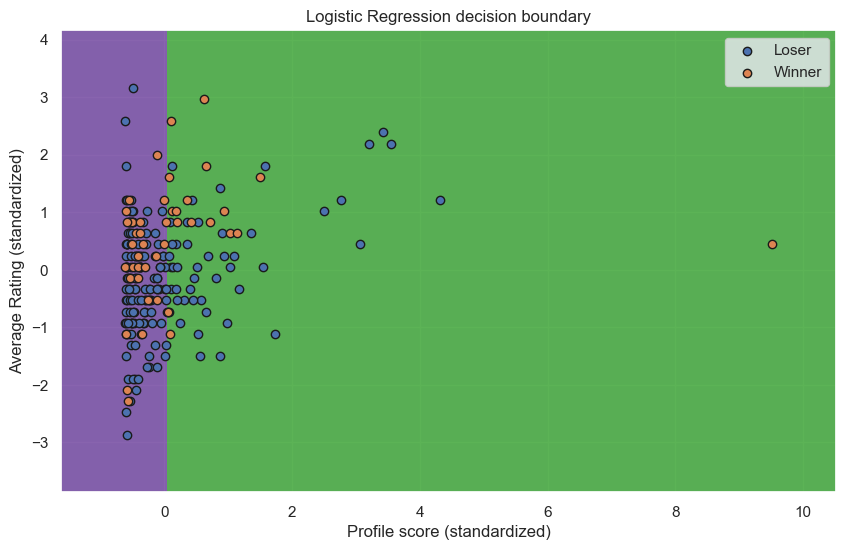

In [ ]:

q3.logreg_ratings(df_Q3)


As we can see on both the weights of the logistic regression (the model gives way more importance to the profile score weight) and the decision boundary (a vertical line), the model only needs a single feature to make its predictions.

With what we discovered just above, this also proves that these metrics are correlated: the second feature does not provide any other meaningful information to make decisions. 

Without the first discovery, one could have argued that this low weight on the average rating would imply that there is no correlation between winning an oscar and the average rating of a movie, but this is obviously not the case.

In conclusion, there is no preference towards high profile directors during the Oscar awards, which could have been expected regarding how the juddging works. These directors simply make great movies.